# Bibliotecas

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## DECLARA SIMBOLOS

In [2]:
x, y, C1, C2, C3, C4 = symbols('x y C1 C2 C3 C4')

## POLINOMIOS DE 2º GRAU

In [3]:
y = C1 + C2*x + C3*x**2

## APLICA CONDIÇÃO DE CONTORNO y(0) = 0 PARA OBTER C1

In [4]:
C1_ = solve(y.subs(x,0), C1)[0]
y = y.subs(C1,C1_)

## APLICA CONDIÇÃO DE CONTORNO y(1) = 0 PARA OBTER C2

In [5]:
C2_ = solve(y.subs(x,1),C2)[0]
y = y.subs(C2,C2_)

## PRIMEIRA DERIVADA DE y

In [6]:
dy = y.diff(x)

## ENERGIA

In [7]:
I = integrate(1/2*dy**2 - 1/2*y**2 - x*y, (x, 0, 1))

## RESOLVER SISTEMA PARA ENCONTRAR C3

In [8]:
syms = [I.diff(C3)]
var = C3
sol = solve(syms, var)
C3_ = sol[C3]

## EQUAÇÃO DA LINHA ELASTICA FINAL

In [9]:
y2 = y.subs(C3,C3_)

## VALIDA SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS

In [10]:
print("y(0) = 0: ", y2.subs(x,0).simplify() == 0)
print("y(1) = 0: ", y2.subs(x,1).simplify() == 0)

y(0) = 0:  True
y(1) = 0:  True


## DECLARA SIMBOLOS

In [11]:
x, y, C1, C2, C3, C4 = symbols('x y C1 C2 C3 C4')

## POLINOMIOS DE 3º GRAU

In [12]:
y = C1 + C2*x + C3*x**2 + C4*x**3

## APLICA CONDIÇÃO DE CONTORNO y(0) = 0 PARA OBTER C1

In [13]:
C1_ = solve(y.subs(x,0), C1)[0]
y = y.subs(C1,C1_)

## APLICA CONDIÇÃO DE CONTORNO y(1) = 0 PARA OBTER C2

In [14]:
C2_ = solve(y.subs(x,1),C2)[0]
y = y.subs(C2,C2_)

## PRIMEIRA DERIVADA DE y

In [15]:
dy = y.diff(x)

## ENERGIA

In [16]:
I = integrate(1/2*dy**2 - 1/2*y**2 - x*y, (x, 0, 1))

## RESOLVER SISTEMA PARA ENCONTRAR C3 E C4

In [17]:
syms = [I.diff(C3), I.diff(C4)]
var = [C3, C4]
sol = solve(syms, var)
C3_ = sol[C3]
C4_ = sol[C4]

## EQUAÇÃO DA LINHA ELASTICA FINAL

In [18]:
y3 = y.subs([(C3,C3_), (C4,C4_)])

## VALIDA SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS

In [19]:
print("y(0) = 0: ", y3.subs(x,0).simplify() == 0)
print("y(1) = 0: ", y3.subs(x,1).simplify() == 0)

y(0) = 0:  True
y(1) = 0:  True


## DECLARA SIMBOLOS

In [20]:
x, A, B = symbols('x A B')

## POLINOMIO SENOIDAL

In [21]:
y = A*sin(x) + B*cos(x) - x

## APLICA CONDIÇÃO DE CONTORNO y(0) = 0 PARA OBTER B

In [22]:
B_ = solve(y.subs(x,0), B)[0]
y = y.subs(B,B_)

## APLICA CONDIÇÃO DE CONTORNO y(1) = 0 PARA OBTER A

In [23]:
A_ = solve(y.subs(x,1), A)[0]
y = y.subs(A,A_)

## PRIMEIRA DERIVADA DE y

In [24]:
dy = y.diff(x)

## ENERGIA

In [25]:
I = integrate(1/2*dy**2 - 1/2*y**2 - x*y, (x, 0, 1))

## EQUAÇÃO DA LINHA ELASTICA FINAL

In [26]:
y4 = y

## VALIDA SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS

In [27]:
print("y(0) = 0: ", y4.subs(x,0).simplify() == 0)
print("y(1) = 0: ", y4.subs(x,1).simplify() == 0)

y(0) = 0:  True
y(1) = 0:  True


## PLOT

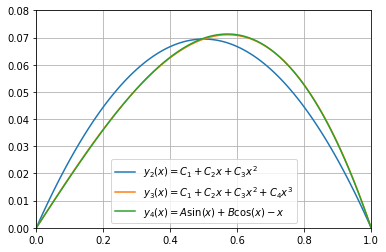

In [28]:
x_range = np.arange(0.0, 1.1, 0.01)

x_2 = list()
x_3 = list()
x_4 = list()
y_2 = list()
y_3 = list()
y_4 = list()

for i in x_range:
    x_2.append(i)
    value2 = y2.subs([(x, i)])
    y_2.append(value2)
    
for i in x_range:
    x_3.append(i)
    value3 = y3.subs([(x, i)])
    y_3.append(value3)

for i in x_range:
    x_4.append(i)
    value = y4.subs([(x, i)])
    y_4.append(value)

plt.plot(x_2, y_2)
plt.plot(x_3, y_3)
plt.plot(x_4, y_4)
plt.xlim([0, 1])
plt.ylim([0, 0.08])
plt.legend(["$y_2(x) = C_{1} + C_{2} x + C_{3} x^{2}$", "$y_3(x) = C_{1} + C_{2} x + C_{3} x^{2} + C_{4} x^{3}$", "$y_4(x) = A \sin(x) + B \cos(x) - x$"])
plt.grid()
plt.show()

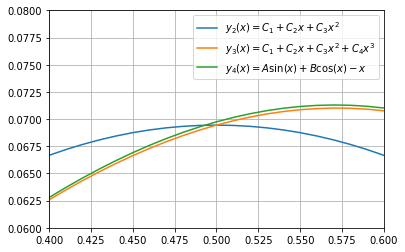

In [30]:
plt.plot(x_2, y_2)
plt.plot(x_2, y_3)
plt.plot(x_2, y_4)
plt.xlim([0.4, 0.6])
plt.ylim([0.06, 0.08])
plt.legend(["$y_2(x) = C_{1} + C_{2} x + C_{3} x^{2}$", "$y_3(x) = C_{1} + C_{2} x + C_{3} x^{2} + C_{4} x^{3}$", "$y_4(x) = A \sin(x) + B \cos(x) - x$"])
plt.grid()

## ENERGIA TOTAL

In [33]:
I2 = integrate(1/2*y2.diff(x)**2 - 1/2*y2**2 - x*y2, (x, 0, 1))
I3 = integrate(1/2*y3.diff(x)**2 - 1/2*y3**2 - x*y3, (x, 0, 1))
I4 = integrate(1/2*y4.diff(x)**2 - 1/2*y4**2 - x*y4, (x, 0, 1)).simplify()
min(I2, I3, I4)

-0.333333333333333 + 0.5/tan(1)